In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
movies = pd.read_csv('F:\Data Science\Menternships\Movie Recommender System\Data\movies_metadata.csv')
movies = movies.drop(columns=['vote_count','vote_average','video','title','tagline','status','spoken_languages','runtime','revenue','release_date','overview','original_language','imdb_id','homepage','genres','budget','belongs_to_collection','adult','popularity','poster_path','production_companies','production_countries'])
movies = movies.rename(columns={'original_title':'title'})
movies.head()

C:\Users\Gandhi\AppData\Local\Temp\ipykernel_8236\3062137166.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('F:\Data Science\Menternships\Movie Recommender System\Data\movies_metadata.csv')


,id,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [18]:
ratings = pd.read_csv('F:/Data Science/Menternships/Movie Recommender System/Data/ratings_small.csv')
ratings = ratings.rename(columns={'movieId':'id'})
ratings = ratings.drop(columns='timestamp')
ratings.head()

,userId,id,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [19]:
movies['id'] = movies['id'].astype(str)
ratings['id'] = ratings['id'].astype(str)

In [22]:
df = pd.merge(ratings, movies, on='id', how='inner')
df.head()

,userId,id,rating,title
0,1,1371,2.5,Rocky III
1,4,1371,4.0,Rocky III
2,7,1371,3.0,Rocky III
3,19,1371,4.0,Rocky III
4,21,1371,3.0,Rocky III


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44994 entries, 0 to 44993
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   userId  44994 non-null  int64  
 1   id      44994 non-null  object 
 2   rating  44994 non-null  float64
 3   title   44994 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
agg_ratings = df.groupby('title').agg(mean_rating=('rating','mean'), no_ratings=('rating','count')).reset_index()
agg_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        2798 non-null   object 
 1   mean_rating  2798 non-null   float64
 2   no_ratings   2798 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 65.7+ KB


In [29]:
# most popular movies
agg_ratings.sort_values(by='no_ratings', ascending=False).head()

,title,mean_rating,no_ratings
2006,Terminator 3: Rise of the Machines,4.256173,324
2265,The Million Dollar Hotel,4.487138,311
2683,Солярис,4.138158,304
2011,The 39 Steps,4.221649,291
1455,Monsoon Wedding,3.706204,274


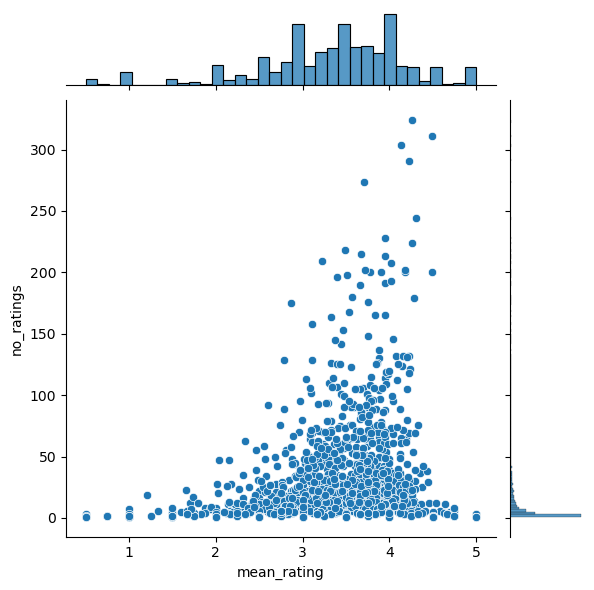

In [30]:
sns.jointplot(x='mean_rating', y='no_ratings', data=agg_ratings)

In [31]:
new_df = pd.merge(df, agg_ratings, on='title', how='inner')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44994 entries, 0 to 44993
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       44994 non-null  int64  
 1   id           44994 non-null  object 
 2   rating       44994 non-null  float64
 3   title        44994 non-null  object 
 4   mean_rating  44994 non-null  float64
 5   no_ratings   44994 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.4+ MB


In [33]:
print(new_df['userId'].nunique(), 'unique users')
print(new_df['id'].nunique(), 'unique movies')
print('Ratings -', sorted(new_df['rating'].unique()))

671 unique users
2830 unique movies
Ratings - [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [34]:
matrix = new_df.pivot_table(index='userId', columns='title', values='rating')
matrix.head()
# Due to this, movies with a rating less than user's average rating get a negative value and those with a rating more than user's average rating get a positive value

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...Più forte ragazzi!,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 + 1,...,사마리아,야수,연가시,오직 그대만,올드보이,"장화, 홍련",최종병기 활,친절한 금자씨,해안선,활
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Normalise the values
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis='rows')
matrix_norm.head()

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...Più forte ragazzi!,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 + 1,...,사마리아,야수,연가시,오직 그대만,올드보이,"장화, 홍련",최종병기 활,친절한 금자씨,해안선,활
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.960000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,0.084906,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Identify similar users - -1 to 1 = Opposite correlation to Similar correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.693375,NaN,NaN,-1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.000000,0.338126,-0.134005,0.377964,NaN,0.348006,-0.218218,0.174078,NaN,...,-0.004118,-1.0,0.137116,-0.350302,0.251455,-0.231774,NaN,-1.00000,-0.737210,0.559017
3,NaN,0.338126,1.000000,NaN,-0.128544,NaN,0.891387,-0.202260,-0.580948,0.866025,...,0.037878,NaN,0.616166,0.043921,0.392442,0.832050,-0.693375,NaN,-0.174078,0.500000
4,0.693375,-0.134005,NaN,1.000000,0.115659,0.634029,0.248891,0.539741,NaN,-0.500000,...,-0.200000,NaN,0.285581,0.517208,0.129099,0.683986,NaN,0.57735,-1.000000,0.156174
5,NaN,0.377964,-0.128544,0.115659,1.000000,NaN,-0.591608,-0.128609,-0.258199,1.000000,...,0.487833,NaN,-0.250583,0.412388,-0.572822,-0.333333,NaN,NaN,-1.000000,-0.083333


In [37]:
# Pick a user and remove it from the list
picked_user = 1
user_similarity.drop(index=picked_user, inplace=True)
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,1.000000,0.338126,-0.134005,0.377964,NaN,0.348006,-0.218218,0.174078,NaN,...,-0.004118,-1.0,0.137116,-0.350302,0.251455,-0.231774,NaN,-1.00000,-0.737210,0.559017
3,NaN,0.338126,1.000000,NaN,-0.128544,NaN,0.891387,-0.202260,-0.580948,0.866025,...,0.037878,NaN,0.616166,0.043921,0.392442,0.832050,-0.693375,NaN,-0.174078,0.500000
4,0.693375,-0.134005,NaN,1.000000,0.115659,0.634029,0.248891,0.539741,NaN,-0.500000,...,-0.200000,NaN,0.285581,0.517208,0.129099,0.683986,NaN,0.57735,-1.000000,0.156174
5,NaN,0.377964,-0.128544,0.115659,1.000000,NaN,-0.591608,-0.128609,-0.258199,1.000000,...,0.487833,NaN,-0.250583,0.412388,-0.572822,-0.333333,NaN,NaN,-1.000000,-0.083333
6,NaN,NaN,NaN,0.634029,NaN,1.000000,NaN,0.684853,NaN,-1.000000,...,NaN,NaN,0.439899,0.447214,NaN,NaN,NaN,NaN,NaN,0.929278


In [38]:
n = 10                                  # number of similar users we would like to display
user_similarity_threshold = 0.35        # limit of correlation to be considered a similar user

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_user]>user_similarity_threshold][picked_user].sort_values(ascending=False)[:n]
print(f'Users similar to user {picked_user} are', similar_users)

Users similar to user 1 are userId
634    1.0
466    1.0
19     1.0
59     1.0
561    1.0
247    1.0
303    1.0
312    1.0
325    1.0
472    1.0
Name: 1, dtype: float64


In [39]:
# movies watched by the picked user
picked_user_watched = matrix_norm[matrix_norm.index==picked_user].dropna(axis=1, how='all')
picked_user_watched

title,American Pie,Greed,Jay and Silent Bob Strike Back,My Tutor,Rocky III,Vivement dimanche!
userId,,,,,,
1,1.666667,-1.333333,-0.333333,-0.333333,0.166667,0.166667


In [40]:
# movies watched by similar users
similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies

title,...Più forte ragazzi!,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,28 Weeks Later,300,36 Fillette,48 Hrs.,5 Card Stud,5x2,...,七人の侍,座頭市,怪獣総進撃,新最佳拍檔,暗戰,纵横四海,薔薇の葬列,隠し砦の三悪人,빈집,사마리아
userId,,,,,,,,,,,,,,,,,,,,,
19,NaN,NaN,NaN,NaN,NaN,-0.471429,1.528571,-0.471429,NaN,NaN,...,-0.471429,0.528571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.083333,1.583333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,NaN,NaN,NaN,NaN,-0.522581,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.477419,NaN,1.477419,NaN,-0.522581,NaN,NaN,NaN
303,-0.613636,NaN,NaN,-0.113636,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.613636,NaN,NaN
312,-1.322785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.677215,-0.322785,NaN,NaN,NaN,NaN,0.677215,NaN,NaN
325,NaN,NaN,NaN,NaN,-1.055556,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223077,NaN,NaN,...,NaN,1.223077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,1.155425,1.155425,-0.844575,NaN,NaN,NaN,NaN,-0.844575,-0.844575,NaN,...,NaN,1.155425,NaN,0.655425,0.155425,0.155425,NaN,NaN,0.155425,-0.844575
561,NaN,NaN,-2.576493,0.423507,-1.076493,NaN,NaN,0.423507,1.423507,-0.576493,...,NaN,NaN,-1.576493,NaN,NaN,NaN,NaN,-0.076493,NaN,NaN


In [41]:
# drop the movies watched by the picked user from similar user movie list
similar_user_movies.drop(picked_user_watched.columns, axis=1, inplace=True, errors='ignore')
similar_user_movies

title,...Più forte ragazzi!,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,28 Weeks Later,300,36 Fillette,48 Hrs.,5 Card Stud,5x2,...,七人の侍,座頭市,怪獣総進撃,新最佳拍檔,暗戰,纵横四海,薔薇の葬列,隠し砦の三悪人,빈집,사마리아
userId,,,,,,,,,,,,,,,,,,,,,
19,NaN,NaN,NaN,NaN,NaN,-0.471429,1.528571,-0.471429,NaN,NaN,...,-0.471429,0.528571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.083333,1.583333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,NaN,NaN,NaN,NaN,-0.522581,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.477419,NaN,1.477419,NaN,-0.522581,NaN,NaN,NaN
303,-0.613636,NaN,NaN,-0.113636,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.613636,NaN,NaN
312,-1.322785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.677215,-0.322785,NaN,NaN,NaN,NaN,0.677215,NaN,NaN
325,NaN,NaN,NaN,NaN,-1.055556,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223077,NaN,NaN,...,NaN,1.223077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,1.155425,1.155425,-0.844575,NaN,NaN,NaN,NaN,-0.844575,-0.844575,NaN,...,NaN,1.155425,NaN,0.655425,0.155425,0.155425,NaN,NaN,0.155425,-0.844575
561,NaN,NaN,-2.576493,0.423507,-1.076493,NaN,NaN,0.423507,1.423507,-0.576493,...,NaN,NaN,-1.576493,NaN,NaN,NaN,NaN,-0.076493,NaN,NaN


In [42]:
item_score = {}                                       # A Dictionary to store item scores
for i in similar_user_movies.columns:                 # Loop through items
    movie_rating = similar_user_movies[i]             # Get the ratings for movie i
    total = 0                                         # Create a variable to store the score
    count = 0                                         # Create a variable to store the number of scores
    for u in similar_users.index:                     # Loop through similar users
        if pd.isna(movie_rating[u])==False:           # If the movie has rating
            score = similar_users[u]*movie_rating[u]  # Score=user similarity x movie rating
            total += score                            # Add the score to the total score so far
            count += 1                                # Add 1 to the count
    item_score[i]=total/count                         # Get the average score for the item
item_score = pd.DataFrame(item_score.items(), columns=['movie','movie_score'])    # Convert dictionary to pandas dataframe
rank_movies = item_score.sort_values(by='movie_score', ascending=False)           # Sort the movies by score
m=10                        # Select top m movies
rank_movies.head(m)

,movie,movie_score
44,Apocalypse Now,1.677215
182,Finding Neverland,1.677215
596,Todo sobre mi madre,1.677215
571,The Sixth Sense,1.619379
450,Snakes on a Plane,1.528571
66,Because I Said So,1.528571
6,36 Fillette,1.528571
90,Broken Flowers,1.528571
485,Terminator Salvation,1.528571
588,The Wrong Trousers,1.528571
